In [192]:
# Import libraries used for the Project
import numpy as np 
import pandas as pd
from scipy import stats
from scipy.stats import skew, kurtosis

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.feature_selection import SelectFromModel

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm

from sklearn.metrics import accuracy_score


import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [193]:
df = pd.read_csv("./ManuelAlvarez_Project1.csv")
df = df.iloc[:, 1:-4]

PART 2

In [194]:
# Check distribution of target variable
df["Rain"].value_counts(normalize=True)


0    0.701718
1    0.298282
Name: Rain, dtype: float64

In [195]:
# Check distribution of State variable
df["State"].value_counts(normalize=True)

4    0.154049
3    0.153776
6    0.153413
5    0.115968
2    0.115877
7    0.115423
1    0.114969
0    0.076525
Name: State, dtype: float64

In [196]:
# Split the data on X and y
X = df.drop("Rain", axis=1)
y = df["Rain"]

In [197]:
# Split the data to Test and Stratify on the target
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [198]:
# Check the distribution of targets
y_test.value_counts(normalize=True)

0    0.701563
1    0.298437
Name: Rain, dtype: float64

In [199]:
# Check the distribution of States
X_test["State"].value_counts(normalize=True)

# it look really close to original, no need to stratify on the split

3    0.165031
6    0.158124
4    0.150491
7    0.121410
2    0.114140
5    0.111232
1    0.109778
0    0.069793
Name: State, dtype: float64

In [200]:
# Splitt to validation set 
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp)

In [201]:
# Check distributions of targets
print(y_train.value_counts(normalize=True))
print(y_val.value_counts(normalize=True))

0    0.701729
1    0.298271
Name: Rain, dtype: float64
0    0.70189
1    0.29811
Name: Rain, dtype: float64


In [202]:
# check the shape of each DF 
print("Training:", X_train.shape)
print("Validation:", X_val.shape)
print("Testing:", X_test.shape)


Training: (6189, 22)
Validation: (2063, 22)
Testing: (2751, 22)


Demo Data Set

In [203]:
# Creating a demo data set with a size of 20 samples
X_train, X_demo, y_train, y_demo = train_test_split(X_train, y_train, test_size=20, random_state=42, stratify=y_train)

In [204]:
# Distribution of the demo data set
y_demo.value_counts(normalize=True)

0    0.7
1    0.3
Name: Rain, dtype: float64

In [205]:
# DF shapes
print("Training:", X_train.shape)
print("Demo Data:", X_demo.shape)

Training: (6169, 22)
Demo Data: (20, 22)


PART 3 - FEATURE SIZE SELECTION

In [206]:
# In part 1 we look at three different techniques for choosing the most relevant features, now I want to investigate the number of features we need
# For this we will use the the function SelectKBest with mutual_info_classif
skb =  SelectKBest(score_func=mutual_info_classif, k="all")

# Fit the SelectKBest
skb_mutual_info =  skb.fit(X_train, y_train)

# Get the features in a data fram
feat_imp_skb_Minf = pd.DataFrame(
    {'feature': X.columns[skb_mutual_info.get_support()].values,
     'importance': skb_mutual_info.scores_
     }
     )

# See results
feat_imp_skb_Minf = feat_imp_skb_Minf.sort_values('importance', ascending=False).reset_index().drop("index", axis= 1)


In [207]:
# Now I will fit each model with the default parameters and see how the accuracy increases by adding more features, we will compare this and from here, 
# Start working independently on each model with the same features and number for all of them
knn = KNeighborsClassifier()
clf = DecisionTreeClassifier()
log_reg = LogisticRegression()
svc = svm.SVC()

# create a dictionary to store our scores
model_features_scores = {"features": [],
                         "model": [],
                         "score": []}

# Loop true each model 
for model in [knn, clf, log_reg, svc]:
    for i in range(2, len(feat_imp_skb_Minf) + 1):
        model.fit(X_train[feat_imp_skb_Minf.feature[:i].values], y_train)
        y_pred = model.predict(X_val[feat_imp_skb_Minf.feature[:i].values])
        model_features_scores["features"].append(i)
        model_features_scores["model"].append(model)
        model_features_scores["score"].append(accuracy_score(y_val, y_pred))

c:\Users\jmanu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\jmanu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [208]:
# Convert the results to a DF 
model_features_scores = pd.DataFrame(model_features_scores)

([<matplotlib.axis.XTick at 0x253b92f4eb0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

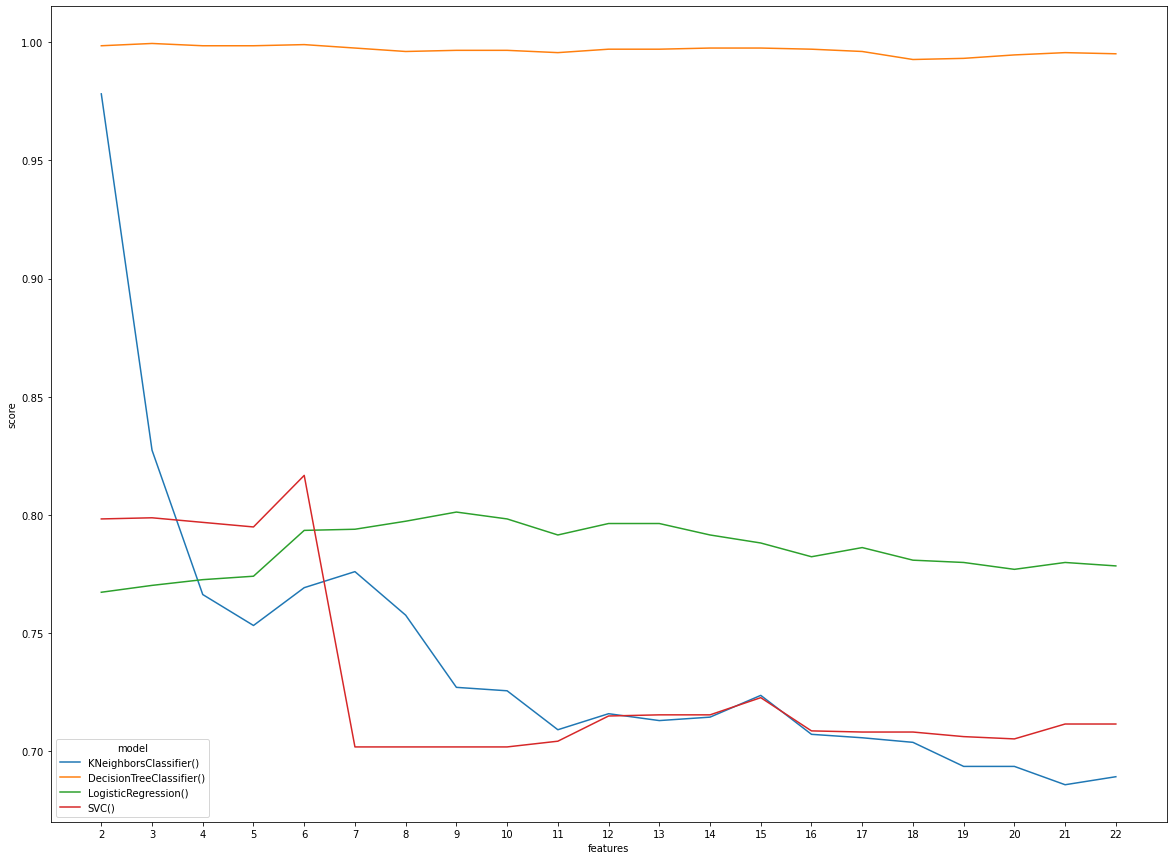

In [209]:
# Visualize the Results
plt.figure(figsize=(20,15))
sns.lineplot(x = model_features_scores["features"], y = model_features_scores["score"], hue = model_features_scores["model"])
plt.xticks(range(2, 23))

In [210]:
# Choose the top 6 features
top6_features = feat_imp_skb_Minf.feature[:6].values
top6_features

array(['Rain_mm', 'RH_9am', 'RH_3pm', 'Temp_3pm', 'Max_Temp', 'Temp_9am'],
      dtype=object)

------- EXPORTING DATA --------------

In [211]:
# Export the Training, Testing and Validation data 
# Now we save the clean DF
X_train[feat_imp_skb_Minf.feature[:6].values].to_csv("X_train.csv", index=False)
X_val[feat_imp_skb_Minf.feature[:6].values].to_csv("X_val.csv", index=False)
X_test[feat_imp_skb_Minf.feature[:6].values].to_csv("X_test.csv", index=False)

y_train.to_csv("y_train.csv", index=False)
y_val.to_csv("y_val.csv", index=False)
y_test.to_csv("y_test.csv", index=False)

